<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/cross_validation_baseline_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing model performance with a simple baseline

In this notebook, we present how to compare the generalization performance of
a model to a minimal baseline. In regression, we can use the `DummyRegressor`
class to predict the mean target value observed on the training set without
using the input features.

We now demonstrate how to compute the score of a regression model and then
compare it to such a baseline on the California housing dataset.

Comparación del rendimiento del modelo con una línea base simple
En este cuaderno, presentamos cómo comparar el rendimiento de generalización de un modelo con una línea base mínima. En la regresión, podemos usar la clase DummyRegressor para predecir el valor objetivo medio observado en el conjunto de entrenamiento sin usar las características de entrada.

Ahora demostramos cómo calcular la puntuación de un modelo de regresión y luego compararla con dicha línea base en el conjunto de datos de vivienda de California.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
section named "Appendix - Datasets description" at the end of this MOOC.</p>
</div>

# **Nota**

Si desea obtener una descripción más detallada de este conjunto de datos, puede consultar la sección denominada "Apéndice - Descripción de los conjuntos de datos" al final de este MOOC.

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [7]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
target

,MedHouseVal
0,452.6
1,358.5
2,352.1
3,341.3
4,342.2
...,...
20635,78.1
20636,77.1
20637,92.3
20638,84.7


Across all evaluations, we will use a `ShuffleSplit` cross-validation splitter
with 20% of the data held on the validation side of the split.

En todas las evaluaciones, utilizaremos un divisor de validación cruzada ShuffleSplit con el 20 % de los datos almacenados en el lado de validación de la división.

In [2]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

We start by running the cross-validation for a simple decision tree regressor
which is our model of interest. Besides, we will store the testing error in a
pandas series to make it easier to plot the results.

Comenzamos ejecutando la validación cruzada para un regresor de árbol de decisión simple, que es nuestro modelo de interés. Además, almacenaremos el error de prueba en una serie de pandas para facilitar la representación gráfica de los resultados.

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
cv_results_tree_regressor = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)

errors_tree_regressor = pd.Series(
    -cv_results_tree_regressor["test_score"], name="Decision tree regressor"
)
errors_tree_regressor.describe()

,Decision tree regressor
count,30.000000
mean,45.705425
std,1.177820
min,42.896092
25%,44.873268
50%,45.733209
75%,46.575024
max,48.122767


Then, we evaluate our baseline. This baseline is called a dummy regressor.
This dummy regressor will always predict the mean target computed on the
training target variable. Therefore, the dummy regressor does not use any
information from the input features stored in the dataframe named `data`.

Luego, evaluamos nuestra línea base. Esta línea base se denomina regresor ficticio. Este regresor ficticio siempre predecirá el objetivo medio calculado en la variable objetivo de entrenamiento. Por lo tanto, el regresor ficticio no utiliza ninguna información de las características de entrada almacenadas en el marco de datos denominado data.

##DummyRegressor es un regresor que realiza predicciones utilizando reglas simples . Este regresor es útil como una línea base simple para comparar con otros regresores (reales). No lo use para problemas reales. Estrategia a utilizar para generar predicciones.

In [4]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
result_dummy = cross_validate(
    dummy, data, target, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)
errors_dummy_regressor = pd.Series(
    -result_dummy["test_score"], name="Dummy regressor"
)
errors_dummy_regressor.describe()

,Dummy regressor
count,30.000000
mean,91.140009
std,0.821140
min,89.757566
25%,90.543652
50%,91.034555
75%,91.979007
max,92.477244


We now plot the cross-validation testing errors for the mean target baseline
and the actual decision tree regressor.

Ahora graficamos los errores de las pruebas de validación cruzada para la línea base objetivo media y el regresor del árbol de decisión real.

In [5]:
all_errors = pd.concat(
    [errors_tree_regressor, errors_dummy_regressor],
    axis=1,
)
all_errors

,Decision tree regressor,Dummy regressor
0,46.568282,90.713153
1,46.519087,90.539353
2,44.087952,91.941912
3,43.999748,90.213912
4,48.122767,92.015862
5,44.384752,90.542490
6,44.155344,89.757566
7,45.200212,92.477244
8,45.547376,90.947952
9,44.621794,91.991373


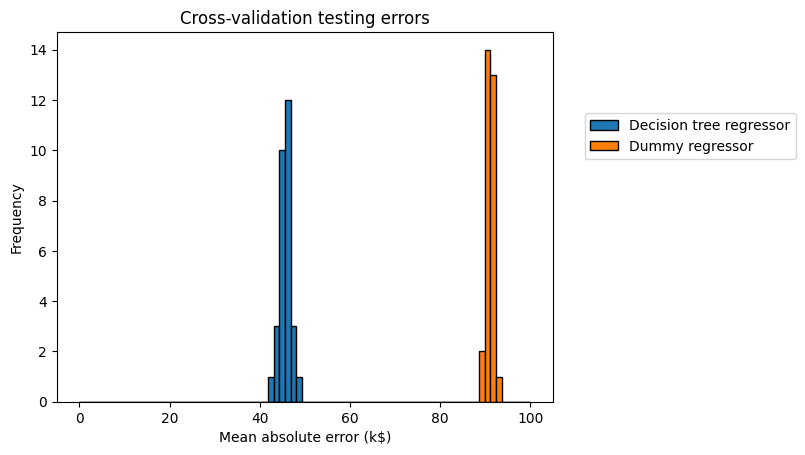

In [6]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0, stop=100, num=80)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")

We see that the generalization performance of our decision tree is far from
being perfect: the price predictions are off by more than 45,000 US dollars on
average. However it is much better than the mean price baseline. So this
confirms that it is possible to predict the housing price much better by using
a model that takes into account the values of the input features (housing
location, size, neighborhood income...). Such a model makes more informed
predictions and approximately divides the error rate by a factor of 2 compared
to the baseline that ignores the input features.

Note that here we used the mean price as the baseline prediction. We could
have used the median instead. See the online documentation of the
[sklearn.dummy.DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)
class for other options. For this particular example, using the mean instead
of the median does not make much of a difference but this could have been the
case for dataset with extreme outliers.

Vemos que el rendimiento de generalización de nuestro árbol de decisión está lejos de ser perfecto: las predicciones de precios están desfasadas en más de 45.000 dólares estadounidenses en promedio. Sin embargo, es mucho mejor que la línea base del precio medio. Esto confirma que es posible predecir el precio de la vivienda mucho mejor utilizando un modelo que tenga en cuenta los valores de las características de entrada (ubicación de la vivienda, tamaño, ingresos del barrio...). Un modelo de este tipo hace predicciones más informadas y divide aproximadamente la tasa de error por un factor de 2 en comparación con la línea base que ignora las características de entrada.

Tenga en cuenta que aquí utilizamos el precio medio como predicción de línea base. Podríamos haber utilizado la mediana en su lugar. Consulte la documentación en línea de la clase sklearn.dummy.DummyRegressor para ver otras opciones. Para este ejemplo en particular, utilizar la media en lugar de la mediana no supone una gran diferencia, pero este podría haber sido el caso para un conjunto de datos con valores atípicos extremos.
